#  <span style="color:darkblue"> Ordinary Differential Equations - Initial Value Problems </span>

<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue"> Learning Objectives </span>

By the end of this module, students will be able to:

### Solve single first-order ODE initial value problems (IVPs)
- Solve a first-order ODE-IVP using the explicit Euler method
- Solve a first-order ODE-IVP using the implicit Euler method
- Solve a first-order ODE-IVP using the predictor-corrector method*
- Solve a first-order ODE-IVP by RK4
- Determine the truncation errors of different numerical integration methods*
- Determine the numerical stability of system of linear IVPs while using explicit numerical integration methods*

### Solve systems of first-order ODE-IVPs
- Solve a system of ODE-IVPs by explicit methods (explicit Euler, RK4)
- Solve a system of ODE-IVPs by implicit Euler
- Analyze the numerical stability of a system of ODE-IVPs*

### Solve single higher-order ODE IVPs
- Reformulate a single higher-order ODE-IVP into system of first-order ODE-IVPs*

\*Not covered in tutorial.

<div class="alert alert-block alert-warning">
<b>INTERACTIVE!</b> Before starting this example, import the <b>Plots.jl</b> library by running the cell below.
</div>

In [1]:
import Pkg; Pkg.add("Plots"); using Plots

   Updating registry at `C:\Users\wilhe\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\wilhe\Project.toml`
No Changes to `C:\Users\wilhe\Manifest.toml`



<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue"> First-order Ordinary Differential Equation, Initial Value Problem (ODE-IVP) </span>

Consider a first-order ODE:

\\[F\left(x,y,\frac{dy}{dx}\right)=0 \\]

with initial condition as $y(x=x_0)=y_0$. For most physical problems, the above ODE-IVP takes the form $F\left(x,y,\frac{dy}{dx}\right)=\frac{dy}{dx}-f(x,y)$ and can be rewritten as:

\\[\frac{dy}{dx}=f(x,y) \\]

The solution strategy for solving the above systems involves marching forward from the initial condition $y_0$ to generate approximations $y_1,y_2,\ldots,$ of the function $y(x)$ for specific values of the independent variable, $x_1,x_2,\ldots$.

# <span style="color:darkblue"> Explicit (Forward) Euler </span>

Explicit Euler is the simplest numerical approximation method for solving IVPs, in which we approximate the derivative with a forward finite difference. This iterative method (integration scheme) is given by:

\\[y_{i+1}:=y_i+hf(x_i,y_i)\\]

where $h$ is the iteration stepsize and denotes the increment between two successive values $h\equiv (x_{i+1}-x_i)$.

**Example 1:** Use explicit Euler to integrate 

\\[\frac{dy}{dx}=x^2y^{1/2} \\]

subject to the initial condition $y(0) = 1$. Plot the profile of $y(x)$ through $x \in [0,2]$.

*Solution:*

The right hand side function $f(x,y)=x^2y^{1/2}$ for implementing explicit Euler is defined in the function f_ex1() given below.



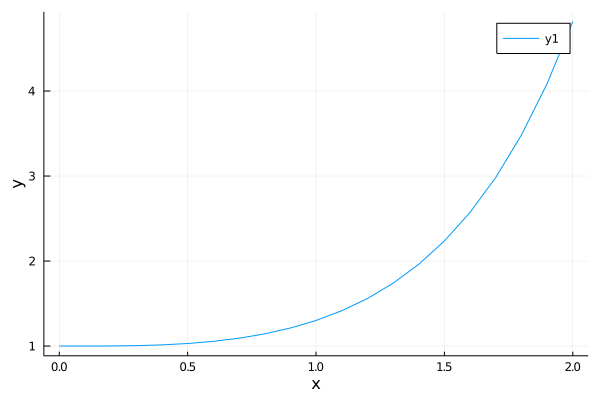

In [8]:
# Define the explicit euler algoritm
function ivp_explicit_euler(f,x0,y0,h,n_out,i_out)
    xout = zeros(n_out + 1)             # Create storage for output
    yout = zeros(n_out + 1)             
    xout[1] = x0                        # Store initial values to first component of output
    yout[1] = y0
    x = x0                              # Initialize working x and y
    y = y0
    for j = 2:(n_out + 1)               # Outer loop over save points
        for i = 1:i_out                 # Advance i_out steps
            y += h*f(x,y)
            x += h
        end
        xout[j] = x                     # Save values after i_out steps
        yout[j] = y
    end
    return xout, yout
end

# Define righ-hand side function and initial condition
f_ex1(x,y) = x^2*y^(1/2)          
x0, y0 = 0.0, 1.0                                                # initial condition
h = 0.1                                                          # step size
n_out = 20                                                       # number of save points
i_out = 1                                                        # number of points between save
x_ex1,y_ex1 = ivp_explicit_euler(f_ex1, x0,y0,h,n_out,i_out)
        
# Plot y(x) through [0.0,2.0]
plot(x_ex1, y_ex1)
xlabel!("x"); ylabel!("y")                                      # Set x label to `x` and y label to `y`

# <span style="color:darkblue"> Implicit (Backward) Euler </span>

Implicit Euler evaluates the derivative at the new values using a backward finite difference approximation. The scheme for implicit Euler is:

\\[y_{i+1}:=y_i+hf(x_{i+1},y_{i+1})\\]

As you can see, the only difference with explicit Euler is that the right-hand side function is evaluated at the next time $f(y_{i+1})$.  Most often, $y_{i+1}$ cannot be calculated analytically (explicitly). Rather, it needs to be computed from the solution of the algebraic equation

\\[R(y_{i+1})=y_{i+1}-y_i-hf(x_{i+1},y_{i+1})=0\\],

which, in general, will be nonlinear. The method of choice for its solution is Newton’s method, and it has to be applied in each step of the integration. Clearly, the implicit Euler method is more difficult to implement than the explicit Euler method, and the local truncation error is the same for both methods. The advantage of implicit Euler is that it is unconditionally stable (important for stability analysis).

**Example 2**: We now use implicit Euler to integrate the function in **Example 1**:

The implicit Euler formula would be written as the root of

\\[R(y_{i+1})=y_{i+1}-y_i-hx_{i+1}^2y_{i+1}^{1/2}=0\\]

To solve for the unknown variable $y_{i+1}$ using **Newton’s method**, we start with an initial guess $y_{i+1}^{(0)}$ and iterate using the formula

\\[y_{i+1}^{(k)}:=y_{i+1}^{(k)}-\frac{R(y_{i+1}^{(k)})}{R'(y_{i+1}^{(k)})}=y_{i+1}^{(k)}-\frac{y_{i+1}^{(k)} - y_i - h x_{i+1}^2 (y_{i+1}^{(k)})^{1/2}}{1-\frac{1}{2}h x_{i+1}^2 (y_{i+1}^{(k)})^{-1/2}}\\]

The functions for solving this problem using implicit Euler are defined as f_ex1() and df_ex1() in the last section.

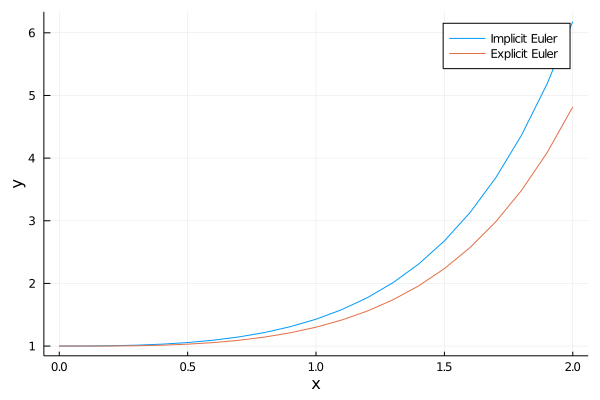

In [15]:
function newton_solve_ie(f, df, y, yold, x, h, tol)
    f_val = f(y,yold,x,h);
    while abs(f_val) > tol
        y = y - f_val/df(y,x,h);
        f_val = f(y,yold,x,h);
    end
    return y
end

function ivp_implicit_euler(f,df,x0,y0,h,n_out,i_out,tol)
    xout = zeros(n_out + 1)                                   # Create storage for output
    yout = zeros(n_out + 1)             
    xout[1] = x0                                              # Store initial values to first component of output
    yout[1] = y0
    x = x0                                                    # Initialize working x and y
    y = y0
    for j = 2:n_out+1
        for i = 1:i_out                                       # Advance i_out steps
            yold = y
            y = newton_solve_ie(f, df, y, yold, x, h, tol)    # Solve nonlinear system to determine next step
            x = x + h;
        end
        xout[j] = x
        yout[j] = y
    end
    return xout, yout
end

f_ex2(y,yold,x,h) = f = y - yold - h*(x+h)^2*y^(0.5)
df_ex2(y,x,h) = 1 - 0.5*h*(x+h)^2*y^(-0.5)

tol = 1E-8                                                                # nonlinear solve, absolute convergence tolerance
x_ex2,y_ex2 = ivp_implicit_euler(f_ex2,df_ex2,x0,y0,h,n_out,i_out,tol)    # run implicit Euler

ax = plot(x_ex2, y_ex2, label = "Implicit Euler")                         # Make plot for implicit solution
plot!(ax, x_ex1, y_ex1, label = "Explicit Euler")                         # Make plot for explicit solution
xlabel!("x"); ylabel!("y")                                                # Set x label to `x` and y label to `y`

We observe a deviation of trajectories between using explicit Euler and implicit Euler. This is due to the accumulation of local truncation errors. 

# <span style="color:darkblue"> Solving Single First-order ODE-IVPs </span>

This method sort-of combines the explicit and implicit Euler methods, by using information on the slope both at $x_i$ and $x_{i+1}$. The algorithm consists of a predictor step which is identical to explicit Euler and an explicit corrector step, the scheme is given by:

\\[y_{i+1}^P=y_i+hf(x_i+y_i)\\
y_{i+1}^C=y_i+hf(x_{i+1},y_{i+1}^P)\\
y_{i+1}=\frac{y_{i+1}^P+y_{i+1}^C}{2}\\]

This method is classified as explicit.

# <span style="color:darkblue"> Runge-Kutta Methods  </span>
The predictor–corrector method and Euler’s method are special cases of a broader class of higher-order explicit methods known as Runge–Kutta methods. By far the most popular Runge–Kutta method is the particular fourth-order method:

\\[k_1:=f(x_i,y_i)\\
k_2:=f(x_i+\frac{h}{2},y_i+\frac{h}{2}k_1)\\
k_3:=f(x_i+\frac{h}{2},y_i+\frac{h}{2}k_2)\\
k_4:=f(x_i+h,y_i+h k_3)\\
y_{i+1}:=y_i+\frac{h}{6}(k_1+2k_2+2k_3+k_4)\\]

This particular method is very efficient and easy to program, and represents a good compromise between the number of functional evaluations and the global accuracy. Given its ubiquitousness, this particular fourth-order Runge–Kutta method is normally called **RK4**.

**Example 3**: We now consider using RK4 to integrate the function in **Example 1**. We'll make use of the right-hand side function previously defined.

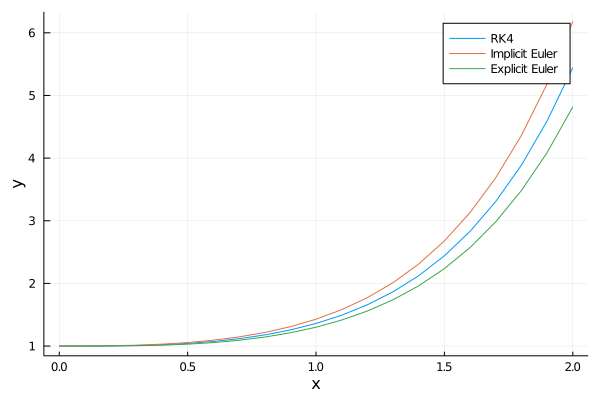

In [17]:
function ivp_RK4(f, x0,y0,h,n_out,i_out)
    xout = zeros(n_out + 1)                                   # Create storage for output
    yout = zeros(n_out + 1)             
    xout[1] = x0                                              # Store initial values to first component of output
    yout[1] = y0
    x = x0                                                    # Initialize working x and y
    y = y0
    for j = 2:n_out+1
        for i = 1:i_out
            k1 = f(x,y);
            k2 = f(x + 0.5*h,y + 0.5*h*k1)
            k3 = f(x + 0.5*h,y + 0.5*h*k2)
            k4 = f(x + h, y + h*k3)
            y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
            x = x + h
        end
        xout[j] = x
        yout[j] = y
    end
    return xout, yout
end

x_ex3,y_ex3 = ivp_RK4(f_ex1,x0,y0,h,n_out,i_out)                          # RK4

# Plot y(x) through [0.0,2.0]
ax = plot(x_ex3, y_ex3, label = "RK4")                                    # Make plot for RK4 solution
plot!(ax, x_ex2, y_ex2, label = "Implicit Euler")                         # Make plot for implicit solution
plot!(ax, x_ex1, y_ex1, label = "Explicit Euler")                         # Make plot for explicit solution
xlabel!("x"); ylabel!("y")                                                # Set x label to `x` and y label to `y` 

Again, the truncation errors accumulate through integration resulting in the deviation of the  trajactories using different methods. Now, try to reduce the deviation by using smaller step size:

<div class="alert alert-block alert-warning">
<b>INTERACTIVE!</b> Reduce the step size to h = 0.01 in the above code, you also need to modify the number of output points n_out for consistency. How does this affect the behavior of the plots?
</div>

<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue">  Solving Systems of Ordinary Differential Equations (IVPs)
    
In this section, we introduce numerical methods to solve a system of IVPs in a vector form as:

\\[\frac{d\mathbf{y}}{dx}=\mathbf{f}(\mathbf y) \\]

with the initial condition $\mathbf y (0)=\mathbf y_0$.  Here, we see that $\mathbf f:\mathbb R^n\to\mathbb R^n$ and $\mathbf y\in\mathbb R^n$, thus we have a system of  equations that must be solved simultaneously. 
    
## Explicit Methods
    
The methods that we have described for single equations can be readily adapted for systems of equations, and the accuracy properties of the methods are unchanged. In particular, the adaptation for explicit methods is really straightforward. All that changes is that you have to step through a system of equations instead of a single equation.
    
### Explicit Euler
The explicit Euler method in this case has the form

\\[\mathbf y_{i+1} := \mathbf y_i + h \mathbf h (\mathbf y_i)\\]
    
### Predictor-corrector
The predictor–corrector method is given by

\\[\mathbf y_{i+1}^P:=\mathbf y_i+h \mathbf f(\mathbf y_i)\\
\mathbf y_{i+1}^C:=\mathbf y_i+h \mathbf f(\mathbf y_{i+1}^P)\\
\mathbf y_{i+1}:=\frac{\mathbf y_{i+1}^P+\mathbf y_{i+1}^C}{2} \\]
    
### RK4
The RK4 scheme becomes

\\[ \mathbf k_1:=\mathbf f_1(\mathbf y_i)\\
\mathbf k_2:=\mathbf f_2(\mathbf y_i+\frac{h}{2}\mathbf k_1)\\
\mathbf k_3:=\mathbf f_3(\mathbf y_i+\frac{h}{2}\mathbf k_2)\\
\mathbf k_4:=\mathbf f_4(\mathbf y_i+h \mathbf k_3)\\
\mathbf y_{i+1}:=y_i+\frac{h}{6}(\mathbf k_1+2\mathbf k_2+2\mathbf k_3+\mathbf k_4) \\]
    
### Implicit Euler
The concepts for solving systems of ODEs are similar for implicit methods, but a bit more complicated. The form of the implicit Euler method becomes 

\\[\mathbf y_{i+1} := \mathbf y_i + h \mathbf f (\mathbf y_{i+1})\\],
    
which is a system of nonlinear algebraic equations requiring Newton–Raphson for solving (at each step). We therefore form the residual vector

\\[\mathbf R(y_{i+1})=\mathbf y_{i+1} - \mathbf y_i - h \mathbf f (\mathbf y _{i+1})=\mathbf 0\\].

In the algorithm, we have an outer loop that is updating the values of $\mathbf y_i$. At each step $i$, we have an inner loop (with counter $k$) that involves first solving

\\[\mathbf J ( \mathbf y_{i+1}^{(k)}) \mathbf \delta ^ {(k+1)}=- \mathbf R ( \mathbf y_{i+1}^{(k)}) \\]
    
and then updating the value for $\mathbf y_{i+1}$,

\\[\mathbf y_{i+1}^{(k+1)} := \mathbf y_{i+1}^{(k)} + \mathbf \delta ^ {(k+1)}\\]
    
**Example 2:** Use RK4 and implicit Euler to solve the system of equations

\\[\frac{dy_1}{dt}=y_1y_2^2 \\
\frac{dy_2}{dt}=(y_1-y_2)^2\\]
    
The initial conditions are $y_1(0)=1$ and $y_2(0)=2$. Plot the profiles of $y_1(x)$ and $y_2(x)$ through time horizon $x \in [0,0.5]$ using both methods.

**Solution:** 
We first consider to use RK4 for integration: we define the variable in the vector form $\mathbf y = (y_1,y_2)$, the right hand side function is then given by $\mathbf f(\mathbf y)$ is defined as f_ex2.

In [19]:
f_ex2(y) = [y[1]*y[2]^2; (y[1]-y[2])^2]

f_ex2 (generic function with 2 methods)

We may then define the RK4 integration scheme (for ODE systems) and use it to integrate the differential equation.

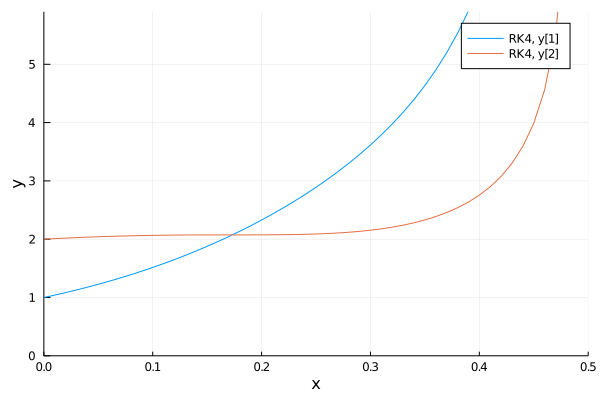

In [36]:
function ivp_RK4_sys(f,x0,y0,h,n_out,i_out)
    xout = zeros(n_out+1); xout[1] = x0
    yout = zeros(n_out+1,length(y0)); yout[1,:] = y0
    x = x0; y = y0;
    for j = 2:n_out+1
        for i = 1:i_out
            k1 = f(y)
            k2 = f(y + 0.5*h*k1)
            k3 = f(y + 0.5*h*k2)
            k4 = f(y + h*k3)
            y = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
            x = x + h
        end
        xout[j] = x
        yout[j,:] = y
    end
    return xout, yout
end
        
x0 = 0.0                                                     # initial condition
y0 = [1.0;2.0]
h = 1e-3                                                     # step size
n_out = 50                                                   # number of output points
i_out = 10                                                   # frequency to save point
x_RK4s, y_RK4s = ivp_RK4_sys(f_ex2,x0,y0,h,n_out,i_out)      # RK4

ax = plot(x_RK4s, y_RK4s[:,1], label = "RK4, y[1]",          # Make plot for component 1 of RK4 solution
          xlim = (0.0, 0.5), ylim = (0.0, 5.9))       
plot!(ax, x_RK4s, y_RK4s[:,2], label = "RK4, y[2]")          # Make plot for component 2 of implicit solution
xlabel!("x"); ylabel!("y")                                   # Set x label to `x` and y label to `y` 

Then, we consider to use implict Euler for integration, the residual can be easily obtained as

\\[ \mathbf{R}=\left\lbrack \begin{array}{c}
y_{1,i+1} -y_{1,i} -{hy}_{1,i+1} y_{2,i+1}^2 \\
y_{2,i+1} -y_{2,i} -{h\left(y_{1,i+1} -y_{2,i+1} \right)}^2 
\end{array}\right\rbrack = \mathbf{0} \\]

The Jacobian is

\\[ \mathbf{J}=\left\lbrack \begin{array}{cc}
1-{hy}_{2,i+1}^2  & -2{hy}_{1,i+1} y_{2,i+1} \\
-2h\left(y_{1,i+1} -y_{2,i+1} \right) & 1+2h\left(y_{1,i+1} -y_{2,i+1} \right)
\end{array}\right\rbrack \\]

The residual R_ex2! and the Jaconian function J_ex2! then specified as:

In [32]:
function R_ex2!(out, y, yold, h)
    out[1] = y[1] - yold[1] - h*y[1]*y[2]^2
    out[2] = y[2] - yold[2] - h*(y[1] - y[2])^2
    return nothing
end

function J_ex2!(out, y, h)
    out[1,1] = 1 - h*y[2]^2
    out[1,2] = -2*h*y[1]*y[2]
    out[2,1] = -2*h*(y[1]-y[2])
    out[2,2] = 1 + 2*h*(y[1]-y[2])
    return nothing
end

J_ex2! (generic function with 1 method)

We may then define the implicit Euler integration scheme (for ODE systems) and use it to integrate the differential equation.

Failed to converge in specified interation limit.


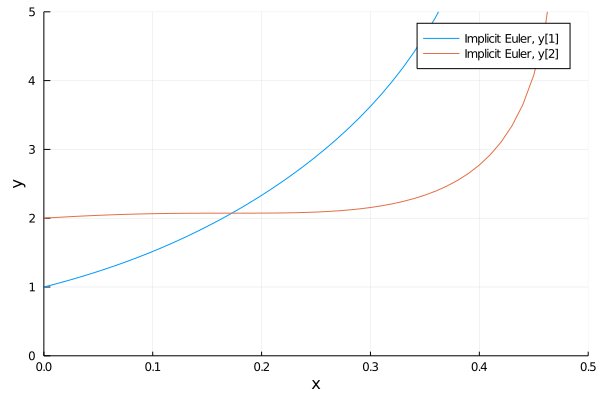

In [56]:
using LinearAlgebra: norm

function ivp_implicit_euler_sys(R!,J!,x0,y0,h,n_out,i_out,tol)
    xout = zeros(n_out+1); xout[1] = x0
    yout = zeros(n_out+1,length(y0)); yout[1,:] = y0
    ny = length(y0)
    R = zeros(ny)
    J = zeros(ny,ny)
    x = x0; y = y0
    for j = 2:n_out+1
        for i = 1:i_out
            yold = y
            R!(R,y,yold,h)
            count = 1
            while norm(R) > tol
                J!(J,y,h)
                del = -J\R
                y += del
                R!(R,y,yold,h)
                count +=  1
                if count > 20
                    println("Failed to converge in specified interation limit.")
                    return xout,yout
                end
            end
            x += h
        end
        xout[j] = x
        yout[j,:] = y
    end
    return xout,yout
end

x0 = 0.0                                                                      # initial condition
y0 = [1.0;2.0]
h = 1e-3                                                                      # step size
n_out = 50                                                                    # number of output points
i_out = 10                                                                    # frequency to save points
tol = 1e-6
x_IEs, y_IEs = ivp_implicit_euler_sys(R_ex2!,J_ex2!,x0,y0,h,n_out,i_out,tol)  # implicit Euler

ax = plot(x_IEs[1:49], y_IEs[1:49,1], label = "Implicit Euler, y[1]",         # Make plot for component 1 of RK4 solution
          xlim = (0.0, 0.5), ylim = (0.0, 5.0))          
plot!(ax, x_IEs[1:49], y_IEs[1:49,2], label = "Implicit Euler, y[2]")        # Make plot for component 2 of implicit solution
xlabel!("x"); ylabel!("y")                                                    # Set x label to `x` and y label to `y`

Notice that the solution is changing very rapidly, and this system diverges around . As a result, it is good that we put in a check for the convergence of Newton–Raphson into our program; otherwise, the solution gets stuck in an infinite loop near the point of divergence.
    
<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue">  Case Study: Series Reactions in a Continuously Stirred Tank Reactor </span>

<img src="CSTR_pic.png" width="300">

As indicated by the above flowchart, species A has a series reaction in a continuous stirred tank reactor (CSTR):

\\[\\]

$F$ is the volumetric flow rate of the feed stream with pure $A$ ($F=100$ L/h); $v$ is the volume of the reactor ($v=100$ L). The reaction rates for each species are given by:

\\[\frac{dC_A}{dt}=\frac{F}{v}(C_{A,in}-C_A)-k_1C_A \\
\frac{dC_B}{dt}=-\frac{F}{v} C_B + k_1 C_A - k_2 C_B \\
\frac{dC_C}{dt} = -\frac{F}{v}C_C + k_2C_B\\]

Real processes often have fluctuating feed conditions, which means the feed stream may have a sinusoidal relationship $C_{A,in}=C_{A,0}(A\cos(\omega t) + 1)$, the system equations becomes

\\[\frac{dC_A}{dt}=\frac{F}{v}(C_{A,0}(\alpha \cos(\omega t)+1)-C_A)-k_1C_A \\
\frac{dC_B}{dt}=-\frac{F}{v} C_B + k_1 C_A - k_2 C_B \\
\frac{dC_C}{dt} = -\frac{F}{v}C_C + k_2C_B\\]

The rate constants are $k_1=3\rm h^{-1}$ and $k_2=1 \rm h^{-1}$, the amplitude for fluctuations in feed is $A=0.1$, and the angular frequency is given by $\omega=2\pi \frac{\rm rad}{\rm s}$. In addition, the initial conditions are given by $C_A(t=0)=C_{A,0}=1 \frac{\rm mol}{\rm L}$, $C_B(t=0)=0 \frac{\rm mol}{\rm L}$ and $C_C(t=0)=0 \frac{\rm mol}{\rm L}$. We want to plot the profile of these species through time $[0.0,5.0]$.

### Solution:
Immediately, we can see that the system is non-autonomous because of the dependence on $t$ in the first equation. Our first step is to convert it into an autonomous system. Our variable vector is initially $\mathbf y = (C_A,C_B,C_C)$, by introducing $y_4=t$, the variable vector becomes $\mathbf y = (C_A,C_B,C_C,t)$. Thus the right hand side function can be rewritten as:

\\[\mathbf{f}\left(\mathbf{y}\right)=\left\lbrack \begin{array}{c}
\frac{F}{v}\left(C_{A,0} \left(\alpha \mathrm{cos}\left(\omega y_4 \right)+1\right)-y_1 \right)-k_1 y_1 \\
-\frac{F}{v}y_2 +k_1 y_1 -k_2 y_2 \\
-\frac{F}{v}y_3 +k_2 y_2 \\
1
\end{array}\right\rbrack \\]

and the initial condition is given by $\mathbf y_0=(1,0,0,0)$. For solving this problem, we consider to use RK4 algorithm and define the right-hand side function below.

In [71]:
function f_CS_param(y,F,v,CA0)
    # process specifications and constants
    a = 0.1
    w = 2*pi # rads/s
    k1 = 3 # h^-1
    k2 = 1 # h^-1

    # residual
    [F/v*(CA0*(a*cos(w*y[4]) + 1) - y[1]) - k1*y[1];
    -F/v*y[2] + k1*y[1] - k2*y[2];
    -F/v*y[3] + k2*y[2];
    1]
end    

f_CS_param (generic function with 1 method)

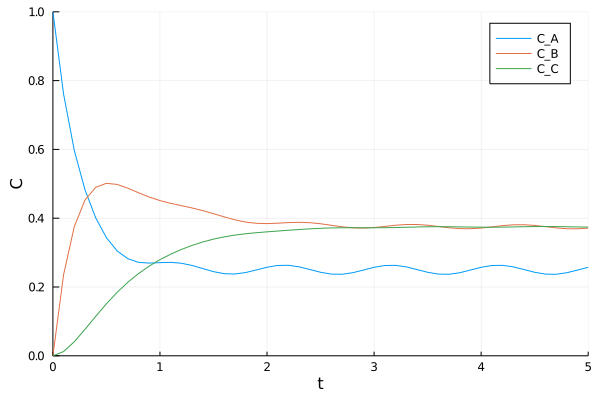

In [77]:
F = 100 # Feed flow rate (L/h)
v = 100 # Reactor volume (L)
CA0 = 1 # Concentration of A in the feed (mol/L)

f_CS(y) = f_CS_param(y,F,v,CA0)                                 # Fix parameters in function

x0 = 0.0                                                        # initial condition
y0 = [1.0;0.0;0.0;0.0]
h = 1e-3                                                        # step size
n_out = 50                                                      # number of output points
i_out = 100                                                     # save frequency
xout_Cs,yout_Cs = ivp_RK4_sys(f_CS,x0,y0,h,n_out,i_out)         # RK4

ax = plot(xout_Cs, yout_Cs[:,1], label = "C_A",         # Make plot for component 1 of RK4 solution
          xlim = (0.0, 5.0), ylim = (0.0, 1.0))          
plot!(ax, xout_Cs, yout_Cs[:,2], label = "C_B")         # Make plot for component 2 of implicit solution
plot!(ax, xout_Cs, yout_Cs[:,3], label = "C_C")         # Make plot for component 2 of implicit solution
xlabel!("t"); ylabel!("C")                               # Set x label to `x` and y label to `y`

<div class="alert alert-block alert-warning">
<b>INTERACTIVE!</b> Now try manipulating the volumetric flowrate of the feed *F*. What flowrate is sufficient to suppress the observed oscillations?
</div>

<hr style="border:6px solid black"> </hr>

# <span style="color:darkblue">  Questions for reflection </span> 

- What are some reasons oscillations may be observed in the above profile? Are the oscillations expected or do they result from a numerical issue? What methods could you use to check this?
- How would the plot potentially differ if solved via the implict Euler method?